<a href="https://colab.research.google.com/github/ejrtks1020/Computer_Vision_Project/blob/main/Dacon-%EC%9E%91%EB%AC%BC%EB%B3%91%ED%95%B4-detection/Dacon_%EC%9E%91%EB%AC%BC_%EB%B3%91%ED%95%B4_%EC%A7%84%EB%8B%A8_detection_inference_(yolov5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Ultralytics Yolov5 설치

In [ ]:
# Clone and install YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
%cd ..

Cloning into 'yolov5'...
remote: Enumerating objects: 11231, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11231 (delta 3), reused 4 (delta 0), pack-reused 11223
Receiving objects: 100% (11231/11231), 11.12 MiB | 22.33 MiB/s, done.
Resolving deltas: 100% (7769/7769), done.
/content/yolov5
     |████████████████████████████████| 596 kB 17.0 MB/s 
/content


# 2. 데이터 다운로드

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from glob import glob
import pandas as pd
import numpy as np 
from tqdm import tqdm
import json
import cv2
import matplotlib.pyplot as plt

import os
import random

In [ ]:
!unzip /content/drive/MyDrive/data.zip

Archive:  /content/drive/MyDrive/data.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.csv               
  inflating: train.zip               


In [ ]:
!unzip train.zip

In [ ]:
train_csv = sorted(glob('/content/train/*/*.csv'))
train_jpg = sorted(glob('/content/train/*/*.jpg'))
train_json = sorted(glob('/content/train/*/*.json'))

crops = []
diseases = []
risks = []
labels = []

# 훈련 데이터 로드
for i in range(len(train_json)):
  with open(train_json[i], 'r') as f:
    sample = json.load(f)
    crop = sample['annotations']['crop']
    disease = sample['annotations']['disease']
    risk = sample['annotations']['risk']
    label = f"{crop}_{disease}_{risk}"

    crops.append(crop)
    diseases.append(disease)
    risks.append
    labels.append(label)

In [ ]:
label_unique = sorted(np.unique(labels))
# Label Encoding
label_unique_encoded = {key:value for key,value in zip(label_unique, range(len(label_unique)))}
CLASS_NAMES = list(label_unique_encoded)

## 테스트 이미지 디렉토리 생성

In [ ]:
!mkdir test

In [ ]:
# test용 이미지와 annotation파일 추출
num_test_imgs = 8
test_index = np.random.choice(len(train_jpg), num_test_imgs)
test_jpg = np.array(train_jpg)[test_index]
test_json = np.array(train_json)[test_index]

In [ ]:
import shutil

# 테스트 디렉토리로 테스트 데이터 복사
for src_jpg_path, src_json_path in zip(test_jpg, test_json):
  dst_jpg_path = os.path.join('/content/test', os.path.basename(src_jpg_path))
  dst_json_path = os.path.join('/content/test', os.path.basename(src_json_path))
  shutil.copyfile(src_jpg_path, dst_jpg_path)
  shutil.copyfile(src_json_path, dst_json_path)

In [ ]:
#원본이미지에 ground truth bounding box 그리는 함수
def draw_box(img_path, json_path):
  sample_img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
  draw_img = sample_img.copy()

  with open(json_path, 'r') as f:
    sample = json.load(f)

    bbox = sample['annotations']['bbox'][0]
    bbox_x = int(bbox['x'])
    bbox_y = int(bbox['y'])
    bbox_h = int(bbox['h'])
    bbox_w = int(bbox['w'])
    cv2.rectangle(draw_img, (bbox_x, bbox_y), (bbox_x + bbox_w, bbox_y + bbox_h), color = (255, 0, 0), thickness = 1)

    crop = sample['annotations']['crop']
    disease = sample['annotations']['disease']
    risk = sample['annotations']['risk']
    label = f"{crop}_{disease}_{risk}"
    cv2.putText(draw_img, label, (bbox_x, bbox_y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    return draw_img

In [ ]:
!mkdir detect_output

## 테스트 데이터 Inference 및 시각화

In [ ]:
# inference 수행
!python yolov5/detect.py --weights '/content/drive/MyDrive/데이콘 작물 병해/dacon/weights/best.pt' \
--conf 0.25 --source /content/test --project detect_output

detect: weights=['/content/drive/MyDrive/데이콘 작물 병해/dacon/weights/best.pt'], source=/content/test, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=detect_output, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-24-g055e72a torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 213 layers, 7077550 parameters, 0 gradients, 16.0 GFLOPs
image 1/8 /content/test/12928.jpg: 480x640 2 4_00_0s, Done. (0.011s)
image 2/8 /content/test/20195.jpg: 480x640 1 6_00_0, Done. (0.007s)
image 3/8 /content/test/55331.jpg: 640x320 1 3_a9_1, Done. (0.011s)
image 4/8 /content/test/57864.jpg: 640x480 1 5_00_0, Done. (0.013s)
image 5/8 /content/test/62192.jpg: 640x480 1 3_00_0, Done. 

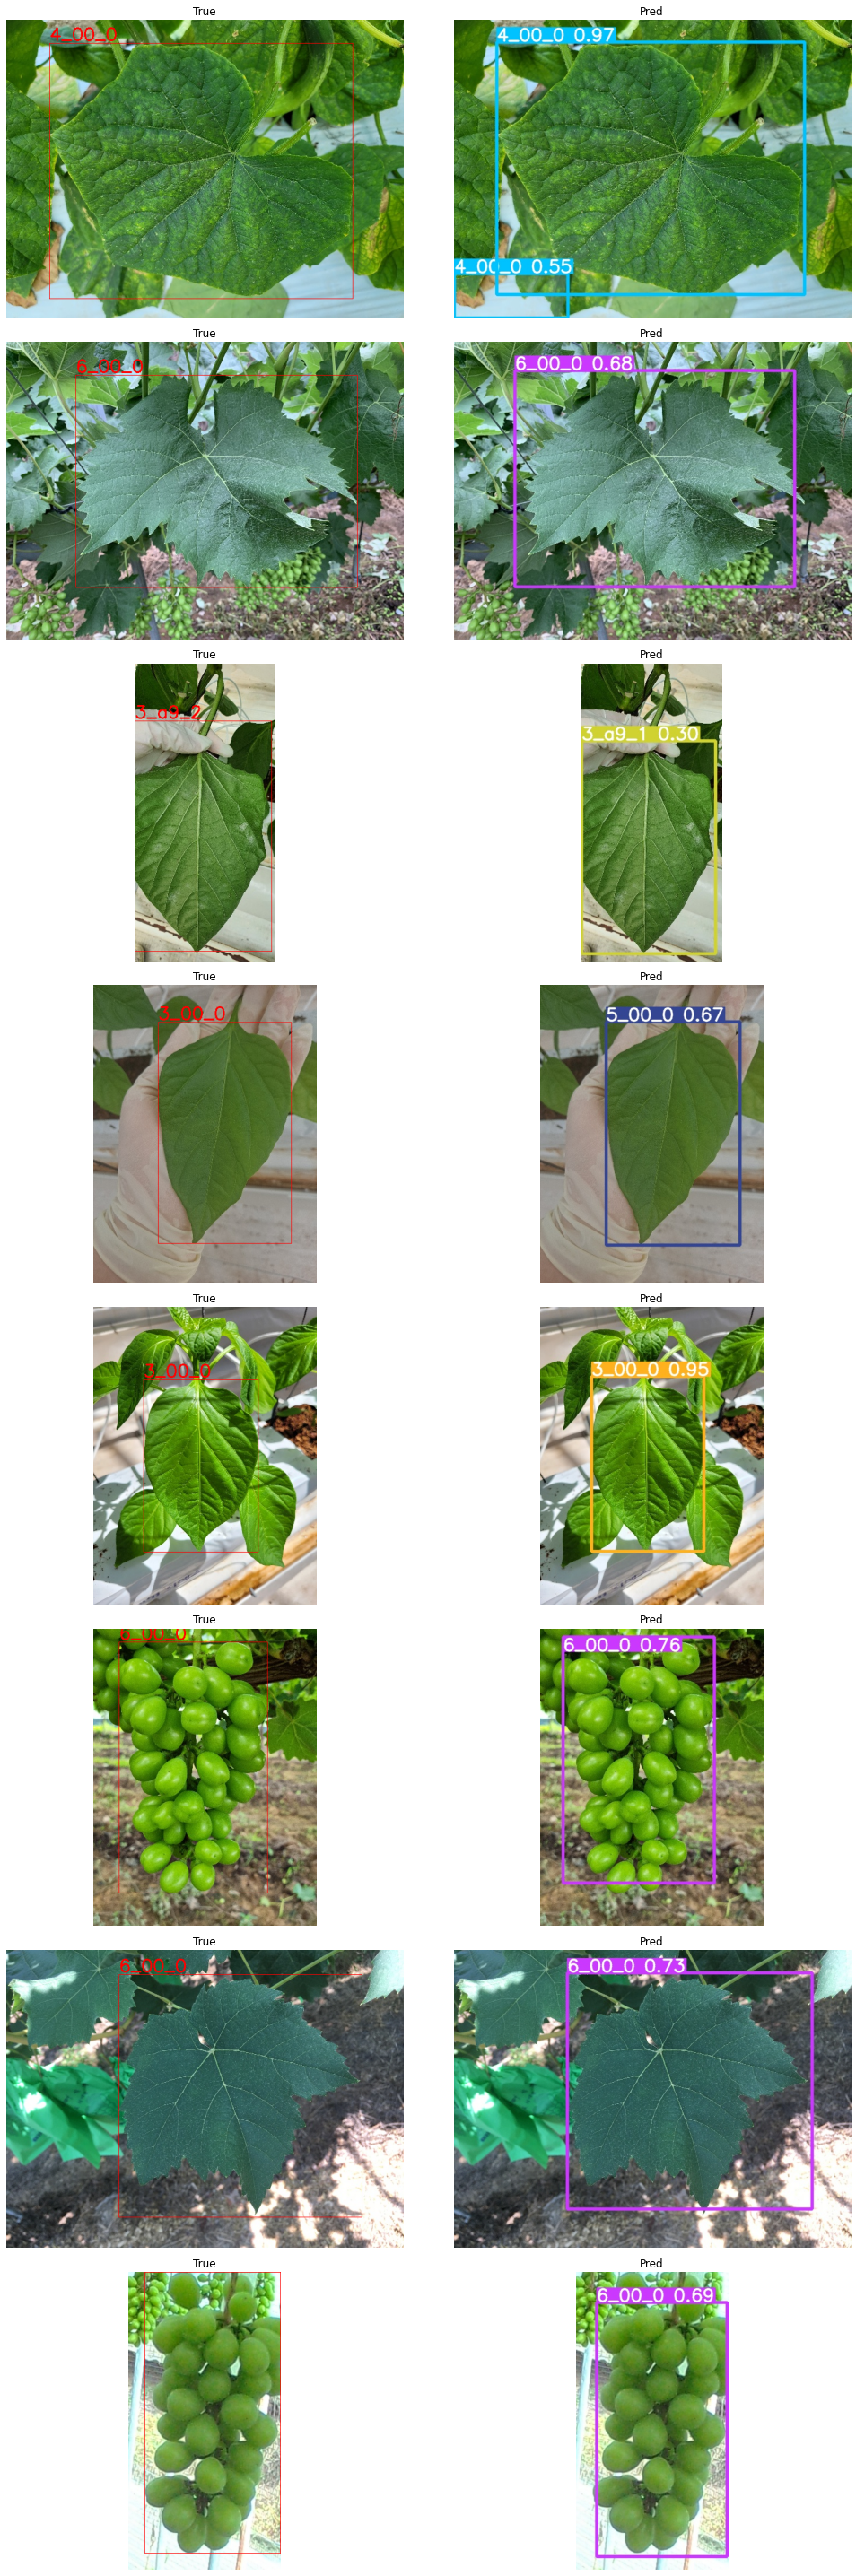

In [ ]:
gt_imgs = sorted(glob('/content/test/*.jpg'))
gt_json = sorted(glob('/content/test/*.json'))
pred_imgs = sorted(glob('/content/detect_output/exp/*.jpg'))

fig, ax = plt.subplots(num_test_imgs, 2, figsize = (15, 40))

i = 0
for gt_img, js, pred_img in zip(gt_imgs, gt_json, pred_imgs):
  gt_bbox_img = draw_box(gt_img, js)
  ax[i, 0].imshow(gt_bbox_img)
  ax[i, 0].set_title('True')
  ax[i, 0].axis('off')

  pred_image = cv2.cvtColor(cv2.imread(pred_img), cv2.COLOR_BGR2RGB)
  ax[i, 1].imshow(pred_image)
  ax[i, 1].set_title('Pred')
  ax[i, 1].axis('off')

  i += 1

plt.tight_layout()